## Analysis of 'Smart' Trashcan Locations
by Leo Morse

link to dataset: https://data.wprdc.org/datastore/dump/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9


In [19]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Let's take a look at our data set as-is!

In [2]:
data = pd.read_csv("trashdata.csv", index_col="container_id")
data.head()

,_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
container_id,,,,,,,,,,,,,,,,
1,341584,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
2,341585,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
3,341586,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
4,341587,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
5,341588,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444


Ok, there's a lot of unneccessary information here. Let's do some tweaking...

(Made the neighborhood the index, added up the number of trashcans per neighborhood, sorted by amount, removed all data except for the number of trash cans per each unique neighborhood)

<Axes: xlabel='neighborhood'>

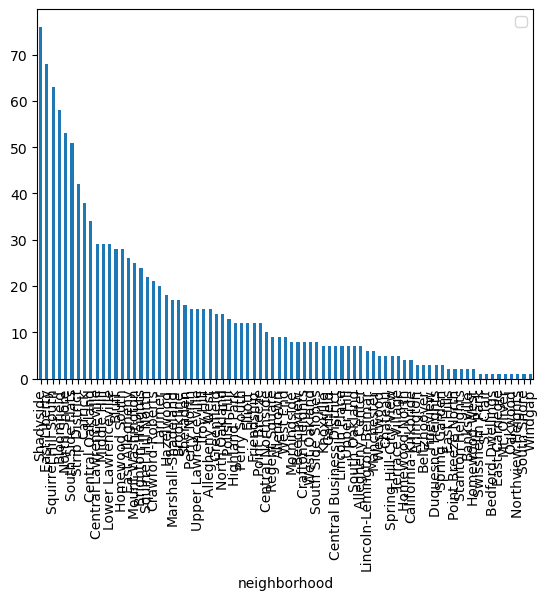

In [3]:
num_cans = data.groupby("neighborhood").count().sort_values(by='_id', ascending=False)
num_cans = num_cans[['_id']]
num_cans.plot.bar()

Woah, that's a lot of neighborhoods! Let's take a look at the top 25.

<Axes: xlabel='neighborhood'>

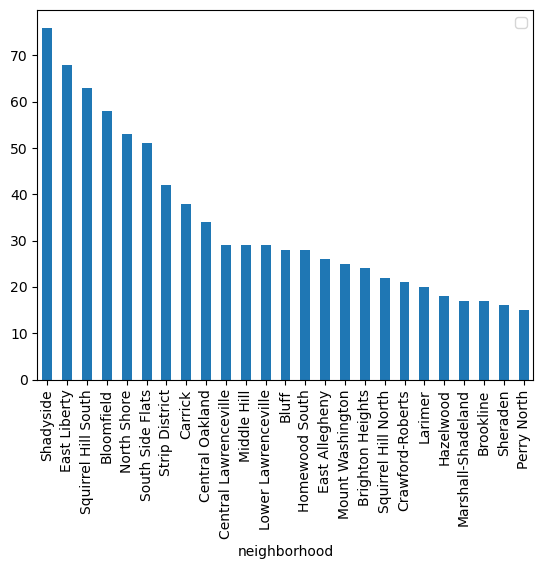

In [4]:
num_cans.head(25).plot.bar()

Now that we have our data in the correct format, let's create a map using Geopandas.

I've included some formatting details to make it more ✨aesthetically pleasing.✨

The grey areas are neighborhoods for which there was no data in this data set.

<Axes: >

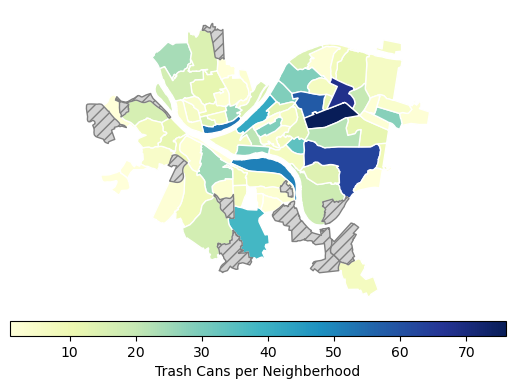

In [51]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
trash_map = neighborhoods.merge(num_cans, how='left', left_on='hood', right_on='neighborhood')
trash_map = trash_map[['hood','_id','geometry']]
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
ax.set_axis_off()
trash_map.plot(column='_id',
              legend=True,
              legend_kwds={'label': "Trash Cans per Neighberhood", 'orientation': 'horizontal'},
              figsize=(15, 10),
              edgecolor="white",
               cmap='YlGnBu',
               missing_kwds={
                   "color": "lightgrey",
                   "edgecolor": "grey",
                   "hatch": "///",
                   "label": "Missing values"},
               ax=ax,
               cax=cax
              )

There you have it! Now let's scale down the data so that it can be used for comparison with the other metrics.

In [46]:
max_trashcans = num_cans.max()
print(max_trashcans)
num_cans['grade'] = num_cans['_id']/76
num_cans.head()

_id      76.0
grade     NaN
dtype: float64


,_id,grade
neighborhood,,
Shadyside,76,1.000000
East Liberty,68,0.894737
Squirrel Hill South,63,0.828947
Bloomfield,58,0.763158
North Shore,53,0.697368
